In [1]:
'''Subject behavioral analysis 
**requires segmented session 3 and 4**
neuroscan and EEG -> segment_trials.ipynb -> (SVD.ipynb/subBehPK.ipynb)'''
import os
from hdf5storage import loadmat, savemat
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
'''Inspect segmented files'''
sub = '105'
ses = '3'
both = True
if both:
    seg_files = sorted([i for i in os.listdir('segmented') if f'{sub}SS' in i])
else:
    seg_files = [f'{sub}SS{ses}_segmented.hdf.mat']



In [3]:
def match_trials(arr,maxTrials):
    a = np.full_like(maxTrials,-1)
    for i,j in enumerate(arr):
        a[i] = j
    return a

if both:
    sub_info3 = loadmat('segmented/'+seg_files[0])
    sub_info4 = loadmat('segmented/'+seg_files[1])
    t3trials = sub_info3['answer'].shape[0]
    t4trials = sub_info4['answer'].shape[0]
    stimblocklabel = np.concatenate((sub_info3['block'],sub_info4['block']),axis=0)
    stimtriallabel = np.concatenate((sub_info3['trial'],sub_info4['trial']),axis=0)
    stimposlabel = np.concatenate((sub_info3['position'],sub_info4['position']),axis=0)
    stimresponsechoice = np.concatenate((sub_info3['choice'][:t3trials],sub_info4['choice'][:t4trials]),axis=0)
    stimresponsetime = np.concatenate((sub_info3['responsetime'][:t3trials],sub_info4['responsetime'][:t4trials]),axis=0)
    time = sub_info3['time']
    answerarray = np.concatenate((sub_info3['answer'],sub_info4['answer']),axis=0)
    featarray = np.concatenate((sub_info3['ordered_features'],sub_info4['ordered_features']),axis=0)
    mlresponse = np.concatenate((sub_info3['model_response'],sub_info4['model_response']),axis=0)
    refindarray = np.concatenate((sub_info3['index order'],sub_info4['index order']),axis=0)
    featson = np.concatenate((sub_info3['feature_start'],sub_info4['feature_start']),axis=0)
    featsoff = np.concatenate((sub_info3['feature_end'],sub_info4['feature_end']),axis=0)
    pkresponsechoice = np.concatenate((sub_info3['pk_choice'][:t3trials],sub_info4['pk_choice'][:t4trials]),axis=0)
    pkresponsetime = np.concatenate((sub_info3['pk_responsetime'][:t3trials],sub_info4['pk_responsetime'][:t4trials]),axis=0)
    pkon = np.concatenate((sub_info3['pk_start'],sub_info4['pk_start']),axis=0)
    pkoff = np.concatenate((sub_info3['pk_off'],sub_info4['pk_off']),axis=0)


else:
    sub_info = loadmat('segmented/'+seg_files[0])
    stimblocklabel = sub_info['block']
    stimtriallabel = sub_info['trial']
    stimposlabel = sub_info['position']
    stimresponsechoice = sub_info['choice']
    stimresponsetime = sub_info['responsetime']
    time = sub_info['time']
    answerarray = sub_info['answer']
    featarray = sub_info['ordered_features']
    mlresponse = sub_info['model_response']
    refindarray = sub_info['index order']
    featson = sub_info['feature_start']
    featsoff = sub_info['feature_end']
    pkresponsechoice = sub_info['pk_choice']
    pkresponsetime = sub_info['pk_responsetime']
    pkon = sub_info['pk_start']
    pkoff = sub_info['pk_off']


IndexError: list index out of range

['Gender', 'Highest Degree', 'Race']
['Age', 'Race', 'Workclass']
['Highest Degree', 'Hours per Week', 'Workclass']
['Gender', 'Race', 'Workclass']
['Hours per Week', 'Occupation', 'Workclass']
['Highest Degree', 'Occupation', 'Workclass']
['Gender', 'Occupation', 'Race']
['Gender', 'Hours per Week', 'Workclass']
['Highest Degree', 'Hours per Week', 'Marital Status']
['Hours per Week', 'Race', 'Workclass']
['Gender', 'Hours per Week', 'Marital Status']
['Hours per Week', 'Occupation', 'Race']
['Marital Status', 'Occupation', 'Race']
['Age', 'Marital Status', 'Occupation']
['Age', 'Marital Status', 'Race']
['Age', 'Occupation', 'Race']
['Hours per Week', 'Marital Status', 'Occupation']
['Gender', 'Marital Status', 'Workclass']
['Highest Degree', 'Marital Status', 'Race']
['Age', 'Highest Degree', 'Workclass']
['Marital Status', 'Occupation', 'Workclass']
['Occupation', 'Race', 'Workclass']
['Highest Degree', 'Marital Status', 'Occupation']
['Age', 'Gender', 'Workclass']
['Highest Degree

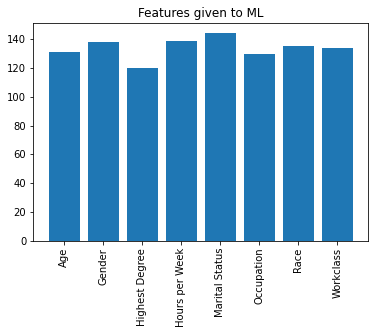

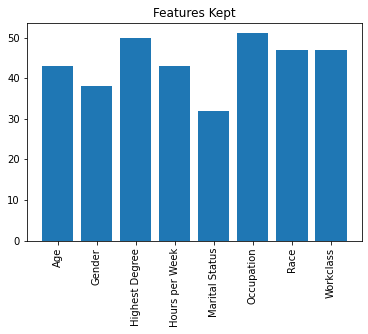

In [ ]:
passresp = {'Age':0,
 'Gender':0,
 'Highest Degree':0,
 'Hours per Week':0,
 'Marital Status':0,
 'Occupation':0,
 'Race':0,
 'Workclass':0}
keepresp = {'Age':0,
 'Gender':0,
 'Highest Degree':0,
 'Hours per Week':0,
 'Marital Status':0,
 'Occupation':0,
 'Race':0,
 'Workclass':0}
pr = {}
kr = {}
for pkresp,f1,f2,f3 in zip(pkresponsechoice,featarray[0::5],featarray[1::5],featarray[2::5]):
    order = sorted([f1.split(': ')[0],f2.split(': ')[0],f3.split(': ')[0]])
    print(order)
    # order = ', '.join(order)
    if ', '.join(order[:2]) not in pr:
        pr[', '.join(order[:2])] = 0
    if ', '.join(order[1:3]) not in pr:
        pr[', '.join(order[1:3])] = 0
    if ', '.join(order[::2]) not in pr:
        pr[', '.join(order[::2])] = 0
    if ', '.join(order[:2]) not in kr:
        kr[', '.join(order[:2])] = 0
    if ', '.join(order[1:3]) not in kr:
        kr[', '.join(order[1:3])] = 0
    if ', '.join(order[::2]) not in kr:
        kr[', '.join(order[::2])] = 0
    if pkresp == 1:
        pr[', '.join(order[:2])] += 1
        pr[', '.join(order[1:3])] += 1
        pr[', '.join(order[::2])] += 1
        passresp[f1.split(': ')[0]] += 1
        passresp[f2.split(': ')[0]] += 1
        passresp[f3.split(': ')[0]] += 1
    if pkresp == 0:
        kr[', '.join(order[:2])] += 1
        kr[', '.join(order[1:3])] += 1
        kr[', '.join(order[::2])] += 1
        keepresp[f1.split(': ')[0]] += 1
        keepresp[f2.split(': ')[0]] += 1
        keepresp[f3.split(': ')[0]] += 1
        
# tot = np.sum(list(passresp.values()))
# for i in passresp:
#     passresp[i] /= tot
plt.bar(passresp.keys(),passresp.values())
plt.xticks(rotation=90)
plt.title('Features given to ML')
plt.show()

# tot = np.sum(list(keepresp.values()))
# for i in keepresp:
#     keepresp[i] /= tot
plt.bar(keepresp.keys(),keepresp.values())
plt.xticks(rotation=90)
plt.title('Features Kept')
plt.show()

In [ ]:
mlresponse = mlresponse[np.where(stimresponsechoice[:mlresponse.shape[0]] != -1)]
answerarray = answerarray[np.where(stimresponsechoice != -1)]
stimresponsechoice = stimresponsechoice[np.where(stimresponsechoice != -1)]

In [ ]:
stimblocklabel.shape

(2625,)

In [ ]:
a = np.full_like(sub_info3['choice'],-1)
for i,j in enumerate(sub_info3['model_response']):
    a[i] = j
a

array([ 1,  0,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  0,
        1,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,
        1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,
        1,  1,  0,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,  1,
        0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  0,  0,
        1,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  1,  1,  0,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,
        0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  1,  1,
        1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,  1,  1,  0,  0,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1])

In [ ]:
sub_info3['choice'].shape[0]

225

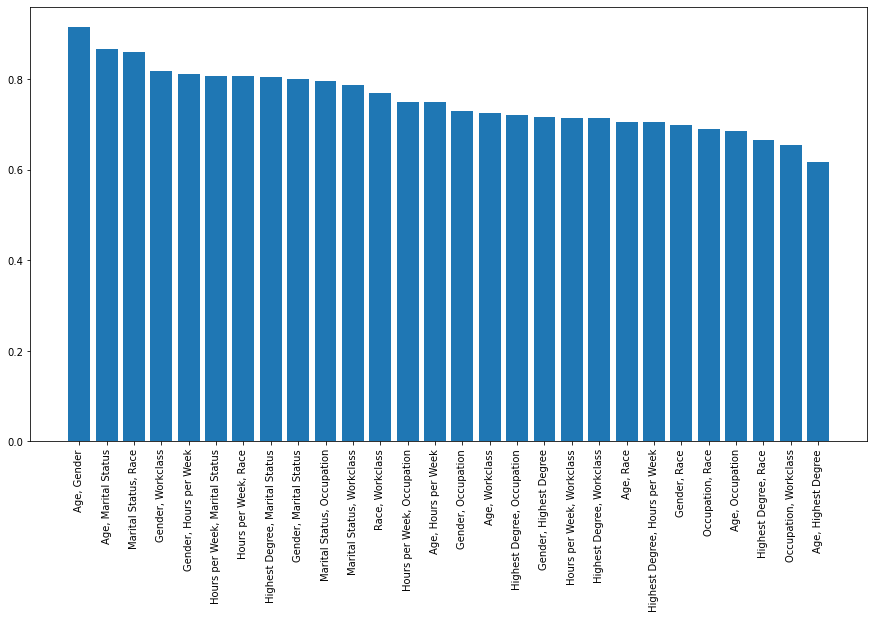

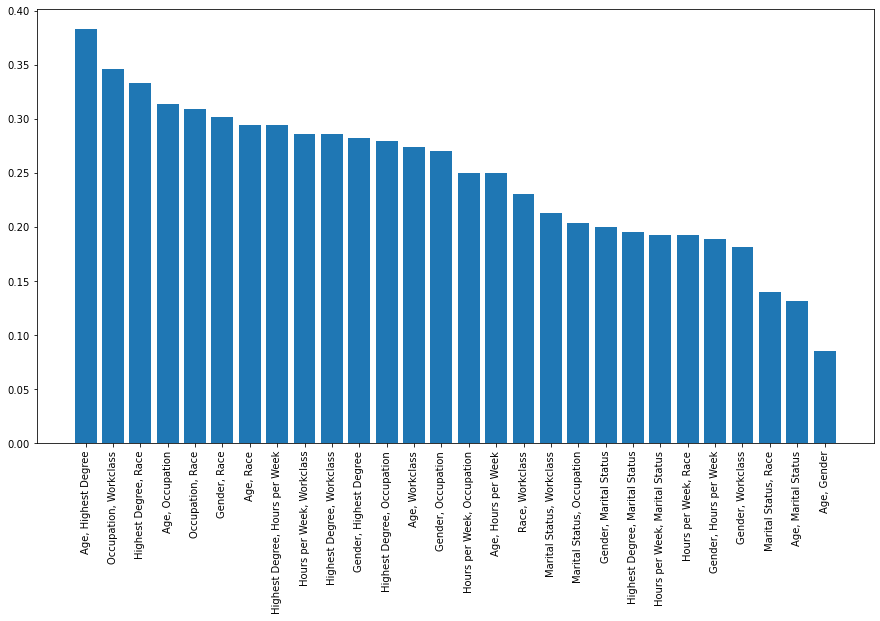

In [ ]:
for i in pr:
    tot = kr[i]+pr[i]
    pr[i] /= tot
    kr[i] /= tot
pr = dict(sorted(pr.items(), key=lambda x:x[1],reverse=True))
kr = dict(sorted(kr.items(), key=lambda x:x[1],reverse=True))
plt.figure(figsize=(15,8))
plt.bar(pr.keys(),pr.values())
plt.xticks(rotation = 90)
plt.show()
plt.figure(figsize=(15,8))
plt.bar(kr.keys(),kr.values())
plt.xticks(rotation = 90)
plt.show()

In [ ]:
prfull = {}
krfull = {}
for pkresp,f1,f2,f3 in zip(pkresponsechoice,featarray[0::5],featarray[1::5],featarray[2::5]):
    order = sorted([f1.split(': ')[0],f2.split(': ')[0],f3.split(': ')[0]])
    order = ', '.join(order)
    if order not in prfull:
        prfull[order] = 0
    if order not in krfull:
        krfull[order] = 0
    if pkresp == 1:
        prfull[order] += 1
    if pkresp == 0:
        krfull[order] += 1

In [ ]:
for i in prfull:
    tot = krfull[i]+prfull[i]
    prfull[i] /= tot
    krfull[i] /= tot
prfull = dict(sorted(prfull.items(), key=lambda x:x[1],reverse=True))
krfull = dict(sorted(krfull.items(), key=lambda x:x[1],reverse=True))


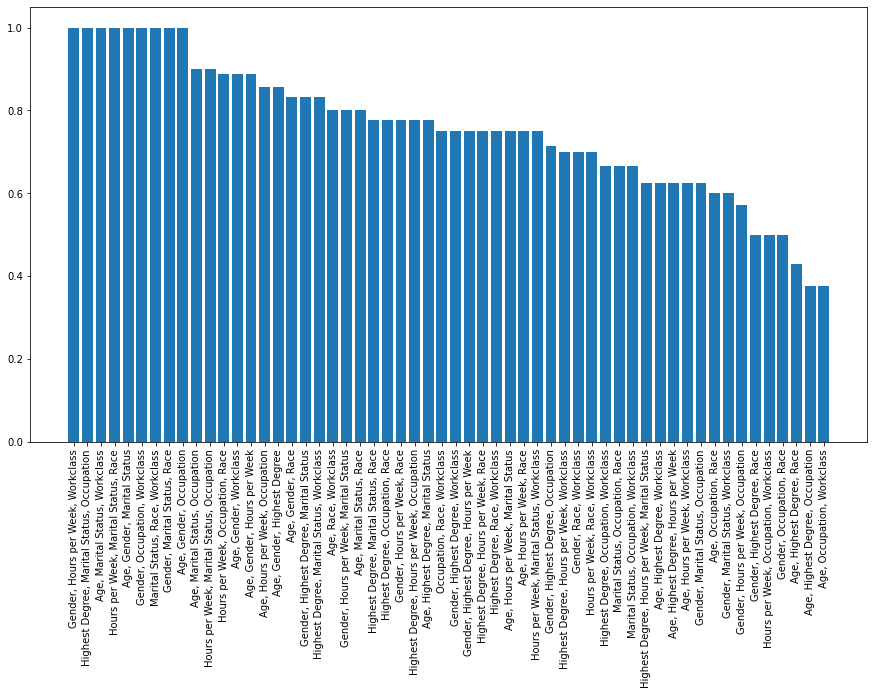

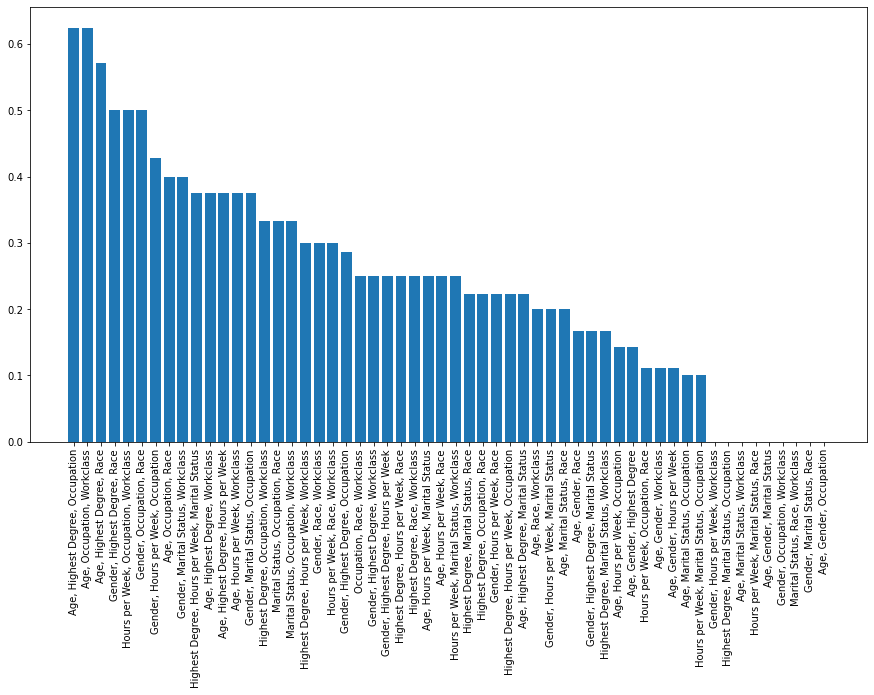

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(prfull.keys(),prfull.values())
plt.xticks(rotation = 90)
plt.show()
plt.figure(figsize=(15,8))
plt.bar(krfull.keys(),krfull.values())
plt.xticks(rotation = 90)
plt.show()

In [ ]:
passChoice = np.where(pkresponsechoice == 0)[0]
keepChoice = np.where(pkresponsechoice == 1)[0]

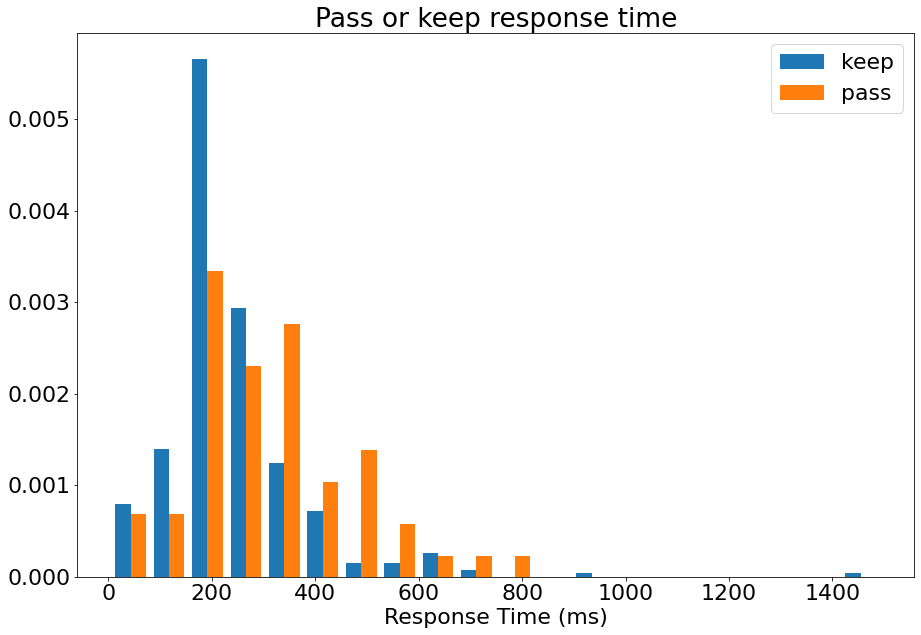

In [ ]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 22})
plt.hist([pkresponsetime[keepChoice],pkresponsetime[passChoice]],bins=20,density = True)
plt.legend(labels=['keep','pass'])
plt.title('Pass or keep response time')
plt.xlabel('Response Time (ms)')
plt.savefig(f'../figures/subject{sub}/Subject{sub}PKTime.png',facecolor='white',format = 'png')
plt.show()

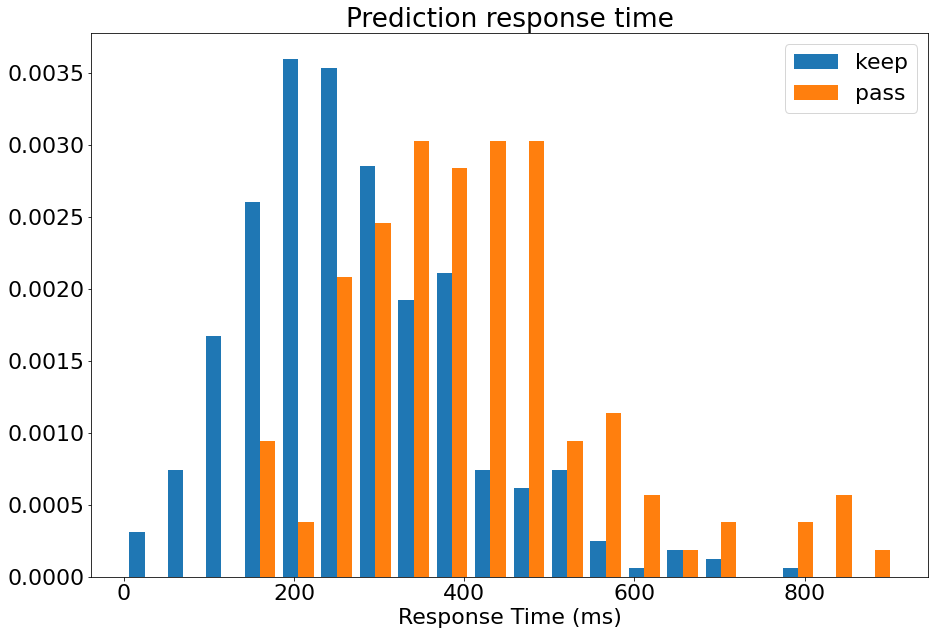

In [ ]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 22})
plt.hist([stimresponsetime[keepChoice],stimresponsetime[passChoice]],bins=20,density = True)
plt.legend(labels=['keep','pass'])
plt.title('Prediction response time')
plt.xlabel('Response Time (ms)')
plt.savefig(f'../figures/subject{sub}/Subject{sub}RT.png',facecolor='white',format = 'png')
plt.show()